# Ordovician reconstructions of arcs, sutures, and temperatures

## Load functions and files

In [58]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import os
%matplotlib inline

### `pygplates` import

In [2]:
import sys
# Replace this with the path to your package
package_path = '/Applications/pygplates_0.36.0_py39_Darwin-x86_64'

# Append the directory to sys.path
if package_path not in sys.path:
    sys.path.append(package_path)
import pygplates

## Data file import

In [3]:
ceed_land_path = '../data/paleogeography/blocks/CEED6_LAND.shp'
ceed_poly_path = '../data/paleogeography/blocks/CEED6_POLY.shp'
rot_path = '../data/paleogeography/models/Torsvik_Cocks_HybridRotationFile.rot'

ceed_modified_land_path = '../data/paleogeography/blocks/CEED6-modified.shp'
modified_rot_path = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended.rot'
modified_rot_path_ice_centroid = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended_ice_centroid.rot'

## Make folder for temporary reconstruction output

The code requires generating reconstructions of shapefiles that are then read in as geopandas dataframe. This code checks for such a folder and makes it if it isn't already there.

In [4]:
output_folder = 'temp_reconstructions'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created.")
else:
    print(f"Folder '{output_folder}' already exists.")

Folder 'temp_reconstructions' already exists.


## Define a function for making map axes

In [5]:
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax, map_projection

## Define paths to paleogeography features

In [9]:
land_color = 'wheat'
water_color = '#f0f8ff'

basins_path = '../data/paleogeography/features/Hirnantian_Glacial_Basins.shp'
glaciomarine_color = '#1f78b4'
grounded_ice_color = '#a6cee3' 
unconformity_color = '#c3c1c1'
basin_colors = {'M': glaciomarine_color, 'G': grounded_ice_color, 'U': unconformity_color}

highlands_path = '../data/paleogeography/features/Gondwana_highlands.shp'
highlands_color = 'tan'

arcs_path = '../data/paleogeography/features/OrdovicianArcs.shp'
arcs_color = '#e38074'

sutures_path = '../data/paleogeography/features/OrdovicianSutures.shp'
sutures_color = '#808000'

ophiolites_path = '../data/paleogeography/features/Ordovician_ophiolites.shp'
ophiolites_color = '#B4C424'

small_ice_path = '../data/paleogeography/features/ice_sheet_small.shp'
large_ice_path = '../data/paleogeography/features/ice_sheet_max.shp'
ice_sheet_color = '#E0FFFF'

lat_grid=[-80,-60,-40,-20,0]

## Plot modified paleogeography with other features

These plots use the modified `TC2017-SHM2017-D2018-extended.rot` rotation file.

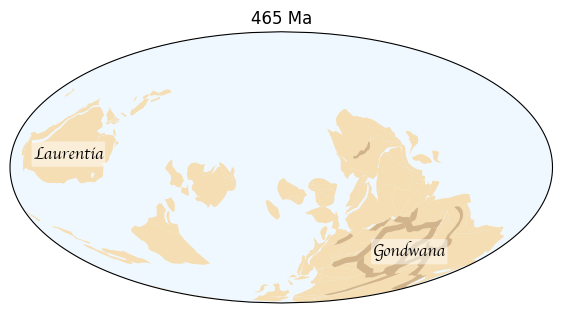

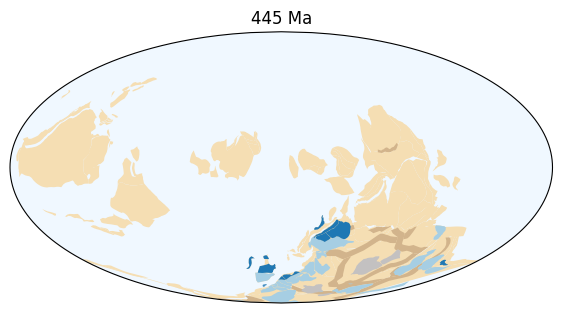

In [10]:
map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 465

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
map_axis.set_facecolor(water_color)

map_axis.text(80, -50, 'Gondwana', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-165, 5, 'Laurentia', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)
map_axis.set_facecolor('#f0f8ff')

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

### Plot sutures, arcs, and ophiolites


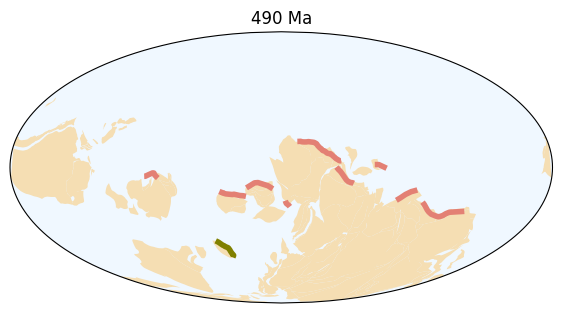

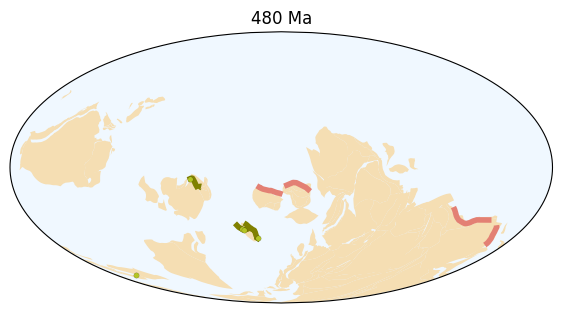

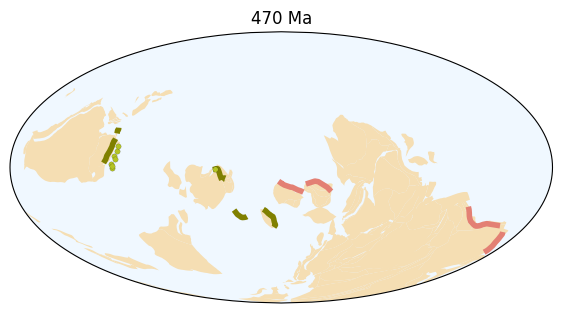

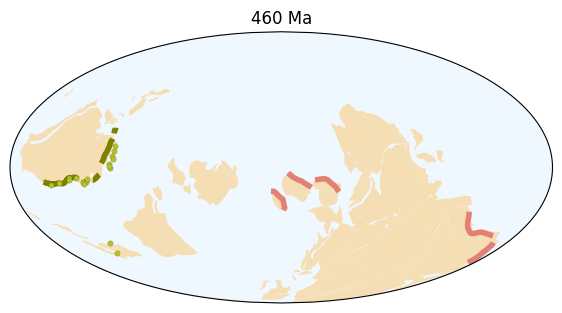

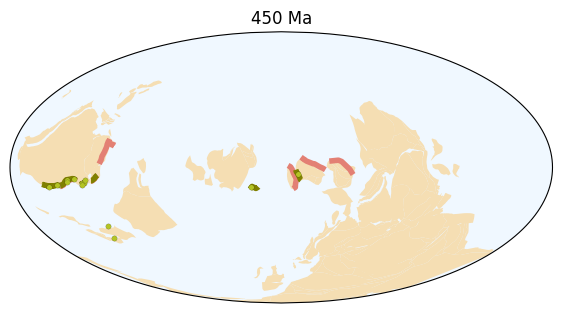

In [16]:
def make_arc_suture_map(t, plot_ophiolites=False, plot_legend=True):
    map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    # highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, markersize=15, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma')
    plt.show()

for t in range(490, 440, -10):
    make_arc_suture_map(t,plot_ophiolites=True)

## Average and plot temperature data

In [18]:
Grossman_2022_phosphate = pd.read_csv('../data/geochemistry/Grossman2022_SI2.csv',header=1)
Grossman_2022_phosphate.head()

,id,igsn,sample,alternate_sample,age,age_min,age_max,age_reference,age_error_ma,age_comment,...,journal,volume,issue,first_page,last_page,year,book_title,book_editor,publisher,authors
0,12163.0,2002941.0,IV,NaN,0.0,0.0,0.0,GTS 2020,NaN,NaN,...,Geology,26,NaN,975,978,1998.0,NaN,NaN,NaN,"Picard, S., S., Garcia, J-P., et al."
1,12164.0,2002943.0,II,NaN,0.0,0.0,0.0,GTS 2020,NaN,NaN,...,Geology,26,NaN,975,978,1998.0,NaN,NaN,NaN,"Picard, S., S., Garcia, J-P., et al."
2,12165.0,2002944.0,III,NaN,0.0,0.0,0.0,GTS 2020,NaN,NaN,...,Geology,26,NaN,975,978,1998.0,NaN,NaN,NaN,"Picard, S., S., Garcia, J-P., et al."
3,12166.0,2002945.0,I,NaN,0.0,0.0,0.0,GTS 2020,NaN,NaN,...,Geology,26,NaN,975,978,1998.0,NaN,NaN,NaN,"Picard, S., S., Garcia, J-P., et al."
4,12187.0,2003616.0,NSB-9b,NaN,0.0,0.0,0.0,GTS 2020,NaN,NaN,...,"Geochimica et Cosmochimica Acta,",65,NaN,1583,1599,2001.0,NaN,NaN,NaN,"Vennemman, T.W., E. Hegner, G. Cliff, and G.W...."


In [56]:
def age_slice(dataframe,age_range_max,age_range_min):
    return dataframe[(dataframe['age']<age_range_max) & (dataframe['age']>=age_range_min)]

Grossman_phosphate_490_450 = age_slice(Grossman_2022_phosphate,495,445)
Grossman_phosphate_490_450['country_ocean'].unique()

array(['Canada', 'USA', nan, 'Argentina', 'Australia', 'Sweden',
       'South China'], dtype=object)

In [61]:
# Function to filter the dataframe based on age range
def age_slice(dataframe, age_range_max, age_range_min):
    return dataframe[(dataframe['age'] < age_range_max) & (dataframe['age'] >= age_range_min)]

ages = [490, 480, 470, 460, 450]
age_ranges = [(age + 5, age - 5) for age in ages]

# Group the countries as needed
country_groups = {
    'Canada+USA': ['Canada', 'USA'],
    'Argentina': ['Argentina'],
    'Australia': ['Australia'],
    'South China': ['South China'],
    'Baltica': ['Sweden']
}

# Initialize lists to store the data
all_groups = []
all_mean_values = []
all_counts = []
all_centroid_lons = []
all_centroid_lats = []
all_min_ages = []
all_max_ages = []
all_ages = []
all_age_ranges = []

# Process each age range
for age_range_max, age_range_min in age_ranges:
    # Filter the dataframe for the current age range
    current_df = age_slice(Grossman_2022_phosphate, age_range_max, age_range_min)
    
    # Calculate the mean, count, and centroids for each group
    for group, countries in country_groups.items():
        filtered_df = current_df[current_df['country_ocean'].isin(countries)]
        mean_value = filtered_df['T (PJ10; -1.08‰)'].mean()
        count = filtered_df.shape[0]
        
        if count > 2 and filtered_df['longitude'].isna().any() == False:
            mean_lon_lat = ipmag.fisher_mean(filtered_df['longitude'].tolist(), filtered_df['latitude'].tolist())
            centroid_lon = mean_lon_lat['dec']
            centroid_lat = mean_lon_lat['inc']
            all_centroid_lons.append(centroid_lon)
            all_centroid_lats.append(centroid_lat)
        elif group == 'South China':
            all_centroid_lons.append(111.3)
            all_centroid_lats.append(30.7)
        else:
            all_centroid_lons.append(np.nan)
            all_centroid_lats.append(np.nan)

        all_groups.append(group)
        all_mean_values.append(mean_value)
        all_counts.append(count)
        all_min_ages.append(age_range_min)
        all_max_ages.append(age_range_max)
        all_ages.append((age_range_max+age_range_min)/2)
        all_age_ranges.append(f"{age_range_min}-{age_range_max}")

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Group': all_groups,
    'Mean Temperature': all_mean_values,
    'Count': all_counts,
    'Centroid Longitude': all_centroid_lons,
    'Centroid Latitude': all_centroid_lats,
    'Min Age': all_min_ages,
    'Max Age': all_max_ages,
    'Age': all_ages,
    'Age Range': all_age_ranges
})

results_df


,Group,Mean Temperature,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range
0,Canada+USA,48.138636,44,247.591923,44.568911,485,495,490.0,485-495
1,Argentina,41.600000,1,NaN,NaN,485,495,490.0,485-495
2,Australia,47.650000,2,NaN,NaN,485,495,490.0,485-495
3,South China,44.500000,2,111.300000,30.700000,485,495,490.0,485-495
4,Baltica,NaN,0,NaN,NaN,485,495,490.0,485-495
5,Canada+USA,43.074510,51,258.231908,37.354957,475,485,480.0,475-485
6,Argentina,39.850000,4,291.245000,-30.220000,475,485,480.0,475-485
7,Australia,NaN,0,NaN,NaN,475,485,480.0,475-485
8,South China,43.100000,9,111.300000,30.700000,475,485,480.0,475-485
9,Baltica,NaN,0,NaN,NaN,475,485,480.0,475-485


In [64]:
temp_results = results_df[(results_df['Centroid Latitude'].notna()) & (results_df['Mean Temperature'].notna()) & (results_df['Count'] > 4)]
temp_results

,Group,Mean Temperature,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range
0,Canada+USA,48.138636,44,247.591923,44.568911,485,495,490.0,485-495
5,Canada+USA,43.074510,51,258.231908,37.354957,475,485,480.0,475-485
8,South China,43.100000,9,111.300000,30.700000,475,485,480.0,475-485
10,Canada+USA,40.466667,13,269.293618,47.366341,465,475,470.0,465-475
11,Argentina,40.100000,7,291.242857,-30.220000,465,475,470.0,465-475
13,South China,39.600000,5,111.300000,30.700000,465,475,470.0,465-475
15,Canada+USA,33.047368,43,266.165313,43.511004,455,465,460.0,455-465
18,South China,36.830000,10,111.300000,30.700000,455,465,460.0,455-465
20,Canada+USA,32.261619,464,271.494807,40.320724,445,455,450.0,445-455


        Group  Mean Temperature  Count  Centroid Longitude  Centroid Latitude  \
0  Canada+USA         48.138636     44          247.591923          44.568911   

   Min Age  Max Age    Age Age Range  
0      485      495  490.0   485-495  
         Group  Mean Temperature  Count  Centroid Longitude  \
5   Canada+USA          43.07451     51          258.231908   
8  South China          43.10000      9          111.300000   

   Centroid Latitude  Min Age  Max Age    Age Age Range  
5          37.354957      475      485  480.0   475-485  
8          30.700000      475      485  480.0   475-485  
          Group  Mean Temperature  Count  Centroid Longitude  \
10   Canada+USA         40.466667     13          269.293618   
11    Argentina         40.100000      7          291.242857   
13  South China         39.600000      5          111.300000   

    Centroid Latitude  Min Age  Max Age    Age Age Range  
10          47.366341      465      475  470.0   465-475  
11         -30.22000

In [50]:
def reconstruct_points(results_df, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile):
    """
    Reconstructs points and saves the output to a shapefile.
    
    Parameters
    ----------
    results_df : pd.DataFrame
        DataFrame containing the points to be reconstructed with columns 'Centroid Latitude' and 'Centroid Longitude'.
    rotation_model_path : str
        Path to the rotation model file (e.g., a .rot file).
    static_polygons_path : str
        Path to the static polygons file (e.g., a .gpml file).
    reconstruction_time : float
        Geological time in millions of years ago to reconstruct the points to.
    output_shapefile : str
        Path to the output shapefile.
    """
    # Load the rotation model and static polygons
    rotation_model = pygplates.RotationModel(rotation_model_path)
    static_polygons = pygplates.FeatureCollection(static_polygons_path)
    
    # Put the points into a feature collection
    point_features = []
    for index, row in results_df.iterrows():
        point = pygplates.PointOnSphere(float(row['Centroid Latitude']), float(row['Centroid Longitude']))
        point_feature = pygplates.Feature()
        point_feature.set_geometry(point)
        point_features.append(point_feature)
    
    # Partition points into plates
    partitioned_point_features = pygplates.partition_into_plates(
        static_polygons,
        rotation_model,
        point_features
    )

    # Reconstruct the points
    pygplates.reconstruct(
        partitioned_point_features,
        rotation_model,
        output_shapefile,
        reconstruction_time, 1
    )
    
def extract_reconstructed_coordinates(shapefile_path):
    """
    Extracts reconstructed coordinates from a shapefile.
    
    Parameters
    ----------
    shapefile_path : str
        Path to the reconstructed shapefile.
        
    Returns
    -------
    pd.DataFrame
        DataFrame containing reconstructed latitude and longitude.
    """
    gdf = gpd.read_file(shapefile_path)
    coords = {'Reconstructed Latitude': gdf.geometry.y, 'Reconstructed Longitude': gdf.geometry.x}
    return pd.DataFrame(coords)

rotation_model_path = modified_rot_path
static_polygons_path = ceed_land_path
reconstruction_time = 480
output_shapefile = output_folder + '/reconstructed_temps.shp'

# Reconstruct the points from results_df
reconstruct_points(temp_results, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)

In [70]:
output_shapefiles = []

for age in temp_results['Age'].unique():
    temp_results_age = temp_results[temp_results['Age'] == age]
    
    rotation_model_path = modified_rot_path
    static_polygons_path = ceed_land_path
    reconstruction_time = int(age)
    output_shapefile = output_folder + '/reconstructed_temps_' + str(age) + '.shp'
    output_shapefiles.append(output_shapefile)
    
    reconstruct_points(temp_results_age, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)


In [75]:
# Read and process all shapefiles
reconstructed_data_frames = []
for shapefile in output_shapefiles:
    df = extract_reconstructed_coordinates(shapefile)
    reconstructed_data_frames.append(df)

# Optionally, concatenate all DataFrames into a single DataFrame
all_reconstructed = pd.concat(reconstructed_data_frames, ignore_index=True)

temp_results = temp_results.reset_index(drop=True)
temp_results['Reconstructed Longitude'] = all_reconstructed['Reconstructed Longitude']
temp_results['Reconstructed Latitude'] = all_reconstructed['Reconstructed Latitude']

temp_results

,Group,Mean Temperature,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range,Reconstructed Longitude,Reconstructed Latitude
0,Canada+USA,48.138636,44,247.591923,44.568911,485,495,490.0,485-495,-171.077784,12.443324
1,Canada+USA,43.074510,51,258.231908,37.354957,475,485,480.0,475-485,-163.644889,5.603717
2,South China,43.100000,9,111.300000,30.700000,475,485,480.0,475-485,8.830700,-16.456715
3,Canada+USA,40.466667,13,269.293618,47.366341,465,475,470.0,465-475,-148.343885,5.305957
4,Argentina,40.100000,7,291.242857,-30.220000,465,475,470.0,465-475,130.222825,-24.959419
5,South China,39.600000,5,111.300000,30.700000,465,475,470.0,465-475,22.764072,-15.755447
6,Canada+USA,33.047368,43,266.165313,43.511004,455,465,460.0,455-465,-154.309927,3.636002
7,South China,36.830000,10,111.300000,30.700000,455,465,460.0,455-465,27.732930,-14.360762
8,Canada+USA,32.261619,464,271.494807,40.320724,445,455,450.0,445-455,-155.706822,-2.619189


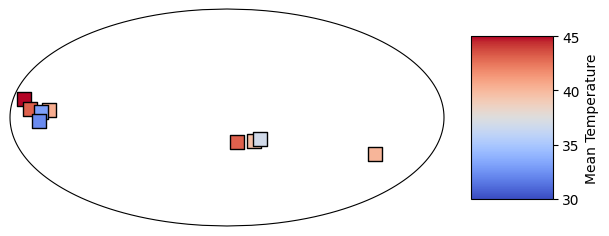

In [76]:
# Create the map and plot the reconstructed points
map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

# Normalize the temperature values for the color map
norm = plt.Normalize(vmin=30, vmax=45)

# Create a scatter plot with the colormap
scatter = map_axis.scatter(temp_results['Reconstructed Longitude'].tolist(), 
                           temp_results['Reconstructed Latitude'].tolist(), 
                           c=temp_results['Mean Temperature'].tolist(),
                           cmap='coolwarm',  # Choose a colormap
                           norm=norm,
                           transform=ccrs.PlateCarree(), 
                           marker='s', 
                           edgecolor='black', 
                           s=100)  # Size of the markers

# Add a color bar
cbar = plt.colorbar(scatter, ax=map_axis, orientation='vertical', pad=0.05, aspect=2)
cbar.set_label('Mean Temperature')
cbar.set_ticks(np.linspace(30, 45, num=4))

plt.show()

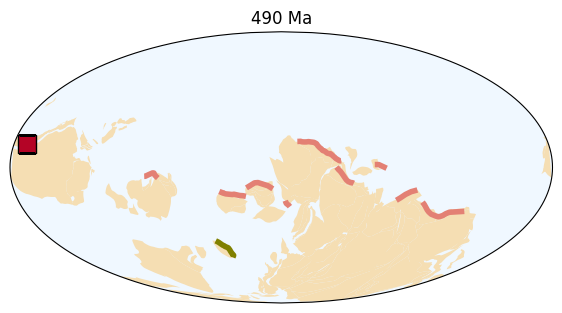

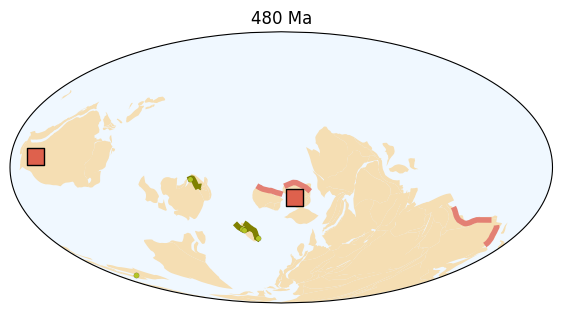

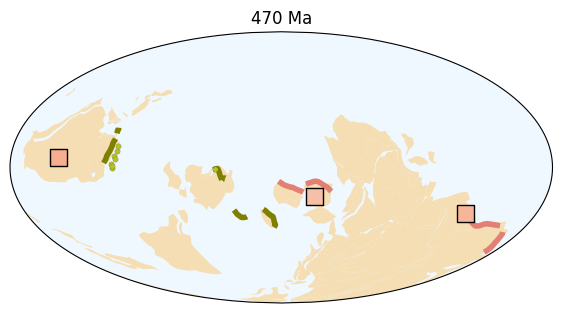

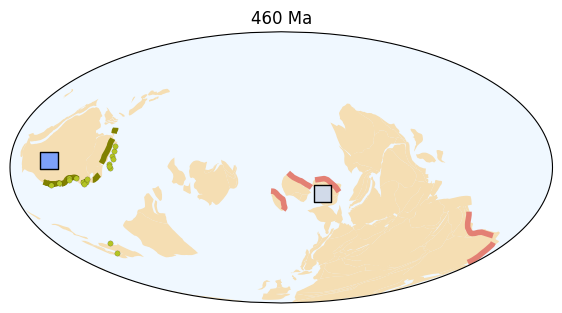

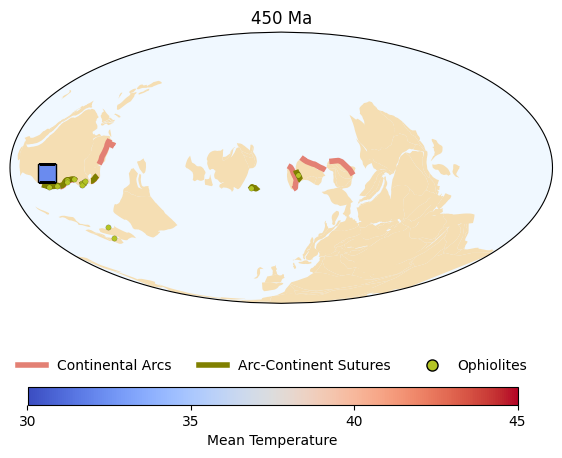

In [84]:
def make_arc_suture_temp_map(t, temp_results, plot_ophiolites=False, legend=True):
    map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    # highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, markersize=15, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma')
    
    temp_results_filtered = temp_results[temp_results['Age'] == t]
    # Normalize the temperature values for the color map
    norm = plt.Normalize(vmin=30, vmax=45)

# Create a scatter plot with the colormap
    scatter = map_axis.scatter(temp_results_filtered['Reconstructed Longitude'].tolist(), 
                                temp_results_filtered['Reconstructed Latitude'].tolist(), 
                                c=temp_results_filtered['Mean Temperature'].tolist(),
                                cmap='coolwarm',  # Choose a colormap
                                norm=norm,
                                transform=ccrs.PlateCarree(), 
                                marker='s', 
                                edgecolor='black', 
                                s=150, zorder=101)  # Size of the markers
    
    if legend==True:
        # Create a new axis below the main plot for the colorbar and legend
        fig = map_axis.get_figure()
        cbar_axis = fig.add_axes([0.15, 0.1, 0.7, 0.03])
        cbar = plt.colorbar(scatter, cax=cbar_axis, orientation='horizontal')
        cbar.set_label('Mean Temperature')
        cbar.set_ticks(np.linspace(30, 45, num=4))

        # Create custom legend handles
        legend_handles = [
            Line2D([0], [0], color=arcs_color, lw=4, label='Continental Arcs'),
            Line2D([0], [0], color=sutures_color, lw=4, label='Arc-Continent Sutures'),
        ]

        if plot_ophiolites:
            legend_handles.append(Line2D([0], [0], color=ophiolites_color, marker='o', lw=0, markersize=8, markeredgecolor='black', label='Ophiolites'))

        # Create a new axis for the legend above the colorbar
        legend_axis = fig.add_axes([0.15, 0.15, 0.7, 0.03])
        legend_axis.axis('off')  # Hide the axis
        legend_axis.legend(handles=legend_handles, loc='center', ncol=3, frameon=False)
    
    plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
    plt.show()

for t in range(490, 450, -10):
    make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False)
    
make_arc_suture_temp_map(450,temp_results, plot_ophiolites=True, legend=True)

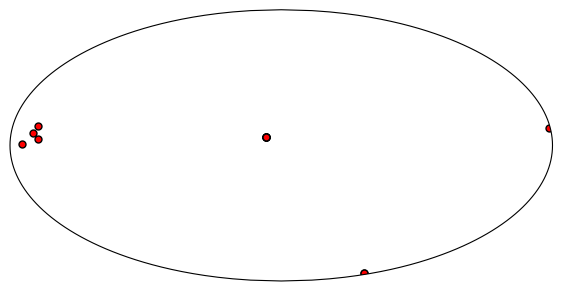

In [39]:
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1, color='black', linestyle='dotted')
    return ax, map_projection

# Create the map and plot the reconstructed points
map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

# Plot the points directly, specifying the CRS of the input data
map_axis.plot(temp_results['Reconstructed Longitude'].tolist(), 
              temp_results['Reconstructed Latitude'].tolist(), 
              transform=ccrs.PlateCarree(), 
              marker='o', 
              color='red', 
              linestyle='None', 
              markersize=5, 
              markeredgecolor='black')

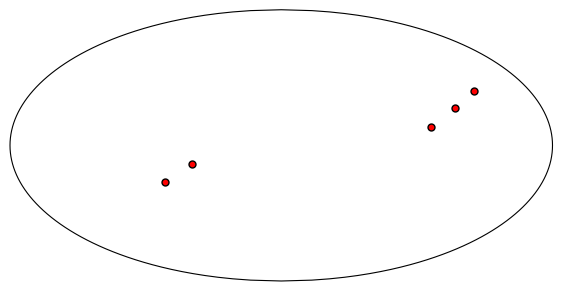

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the DataFrame containing 'Reconstructed Longitude' and 'Reconstructed Latitude'
temp_results = pd.DataFrame({
    'Reconstructed Latitude': [10, 20, 30, -10, -20],
    'Reconstructed Longitude': [100, 120, 140, -60, -80]
})

# Using the provided make_map function to create the map
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1, color='black', linestyle='dotted')
    return ax, map_projection

# Create the map and plot the reconstructed points
map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

# Plot the points directly, specifying the CRS of the input data
map_axis.plot(temp_results['Reconstructed Longitude'].tolist(), 
              temp_results['Reconstructed Latitude'].tolist(), 
              transform=ccrs.PlateCarree(), 
              marker='o', 
              color='red', 
              linestyle='None', 
              markersize=5, 
              markeredgecolor='black')

plt.show()

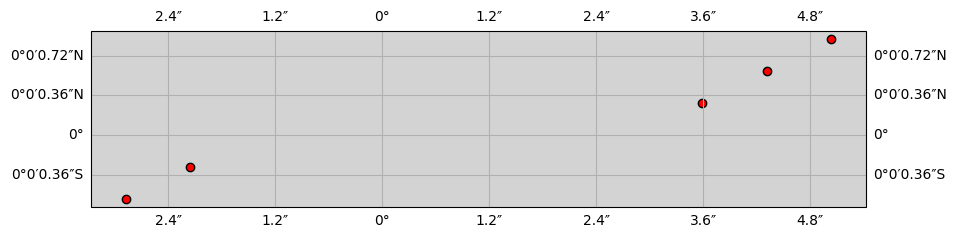

In [41]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the make_map function
def make_map(projection=ccrs.Mollweide(), figsize=(10, 5), grid_lines=True):
    """
    Create a map with the specified projection.

    Parameters
    ----------
    projection : cartopy.crs.Projection, optional
        The map projection to use, by default ccrs.Mollweide().
    figsize : tuple, optional
        Figure size, by default (10, 5).
    grid_lines : bool, optional
        Whether to show grid lines, by default True.

    Returns
    -------
    map_axis : matplotlib.axes._subplots.AxesSubplot
        The map axis object.
    proj_plot : cartopy.crs.Projection
        The projection used for plotting.
    """
    fig, map_axis = plt.subplots(figsize=figsize,
                                 subplot_kw={'projection': projection})
    map_axis.add_feature(cfeature.COASTLINE)
    map_axis.add_feature(cfeature.BORDERS, linestyle=':')
    map_axis.add_feature(cfeature.LAND, facecolor='lightgray')
    map_axis.add_feature(cfeature.OCEAN, facecolor='lightblue')
    
    if grid_lines:
        map_axis.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    
    return map_axis, projection

# Assuming temp_results is your DataFrame containing 'Reconstructed Longitude' and 'Reconstructed Latitude'
temp_results = pd.DataFrame({
    'Reconstructed Latitude': [10, 20, 30, -10, -20],
    'Reconstructed Longitude': [100, 120, 140, -60, -80]
})

# Create the map and plot the reconstructed points
map_axis, proj_plot = make_map(ccrs.Mollweide(), figsize=(10, 5), grid_lines=True)
map_axis.scatter(temp_results['Reconstructed Longitude'], temp_results['Reconstructed Latitude'], color='red', edgecolor='black')

plt.show()

## Import ice flow data


In [42]:
# Import a shapefile with iceflow direction vectors
iceflow_path = 'paleogeo_files/basins/iceflow.shp'

# Import iceflow vectors using geopandas

iceflow_vectors = gpd.read_file(iceflow_path)

lon = iceflow_vectors['geometry'].apply(lambda geom: geom.xy[0][0])
lat = iceflow_vectors['geometry'].apply(lambda geom: geom.xy[1][0])

# use bearing angle to calculate dx and dy
iceflow_vectors['dx'] = np.sin(np.radians(iceflow_vectors['Bearing']))
iceflow_vectors['dy'] = np.cos(np.radians(iceflow_vectors['Bearing']))

map_axis, proj_plot = make_map(ccrs.Orthographic, central_latitude=0)
map_axis.add_feature(ccrs.cartopy.feature.LAND, zorder=0, edgecolor='black', facecolor='tan')
map_axis.quiver(lon, lat, iceflow_vectors['dx'], iceflow_vectors['dy'], 
                scale=20, color='royalblue', width=0.005, headwidth=5, headlength=7, 
                minshaft=2, minlength=0.1, transform=ccrs.PlateCarree())

plt.show()

TypeError: make_map() got an unexpected keyword argument 'central_latitude'

In [ ]:
iceflow_vectors

,id,Bearing,geometry,dx,dy
0,2,20.0,POINT (-54.36180 -5.61106),3.420201e-01,9.396926e-01
1,2,272.0,POINT (-38.27067 -6.34486),-9.993908e-01,3.489950e-02
2,2,305.0,POINT (-39.73827 -10.64282),-8.191520e-01,5.735764e-01
3,2,235.0,POINT (-44.87485 -20.86356),-8.191520e-01,-5.735764e-01
4,2,180.0,POINT (-54.88594 -13.26352),1.224647e-16,-1.000000e+00
5,1,0.0,POINT (-7.79262 40.89547),0.000000e+00,1.000000e+00
6,1,0.0,POINT (-6.21549 43.07151),0.000000e+00,1.000000e+00
7,1,0.0,POINT (5.82770 27.28296),0.000000e+00,1.000000e+00
8,1,23.0,POINT (35.28429 29.95736),3.907311e-01,9.205049e-01
9,1,345.0,POINT (36.23180 28.72682),-2.588190e-01,9.659258e-01


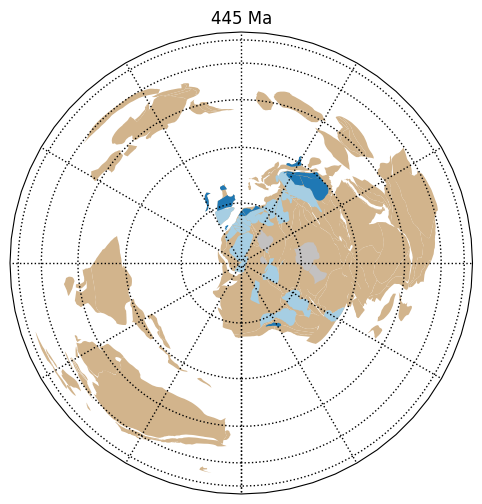

In [ ]:
map_axis, proj_plot = make_map(ccrs.LambertAzimuthalEqualArea, central_latitude=-90)
t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor='tan', edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

map_axis.set_title(f'{t} Ma')
plt.show()